In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, runninga this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\Sujith\Google Drive\DCU\Cloud Technologies\Assignment2\cleaned_file.csv')
train = train[train.total_price > 0]

In [3]:
dataCols = [
'neighbourhood_cleansed'
,'property_type'
,'room_type'
,'beds'
,'guests_included'
,'amenity_cnt'
,'amenities_tv_ind'
,'amenities_cable_tv_ind'
,'amenities_internet_ind'
,'amenities_wifi_ind'
,'amenities_kitchen_ind'
,'amenities_paid_park_off_ind'
,'amenities_free_park_on_ind'
,'amenities_heating_ind'
,'amenities_family_friendly_ind'
,'amenities_washer_ind'
,'amenities_dryer_ind'
,'amenities_priv_entrance_ind'
,'amenities_bathtub_ind'
,'amenities_coffee_maker_ind'
,'amenities_garden_ind'
,'amenities_park_free_street_ind'
,'amenities_24hr_checkin_ind'
,'amenities_breakfast_ind'
,'amenities_smoking_allowed_ind'
,'amenities_pets_allowed_ind'
,'amenities_en_suite_ind'
,'amenities_dishwasher_ind'
,'amenities_lockbox_ind'
,'amenities_microwave_ind'
,'amenities_fridge_ind'
,'amenities_oven_ind'
,'amenities_stove_ind'
,'amenities_balcony_ind'
,'amenities_terrace_ind'
,'amenities_self_checkin_ind'
,'amenities_host_meets_you_ind'
,'amenities_air_con_ind'
]

In [4]:
print(dataCols)


['neighbourhood_cleansed', 'property_type', 'room_type', 'beds', 'guests_included', 'amenity_cnt', 'amenities_tv_ind', 'amenities_cable_tv_ind', 'amenities_internet_ind', 'amenities_wifi_ind', 'amenities_kitchen_ind', 'amenities_paid_park_off_ind', 'amenities_free_park_on_ind', 'amenities_heating_ind', 'amenities_family_friendly_ind', 'amenities_washer_ind', 'amenities_dryer_ind', 'amenities_priv_entrance_ind', 'amenities_bathtub_ind', 'amenities_coffee_maker_ind', 'amenities_garden_ind', 'amenities_park_free_street_ind', 'amenities_24hr_checkin_ind', 'amenities_breakfast_ind', 'amenities_smoking_allowed_ind', 'amenities_pets_allowed_ind', 'amenities_en_suite_ind', 'amenities_dishwasher_ind', 'amenities_lockbox_ind', 'amenities_microwave_ind', 'amenities_fridge_ind', 'amenities_oven_ind', 'amenities_stove_ind', 'amenities_balcony_ind', 'amenities_terrace_ind', 'amenities_self_checkin_ind', 'amenities_host_meets_you_ind', 'amenities_air_con_ind']


In [5]:
categorical_features = train[dataCols].select_dtypes(include = ["object"]).columns
numerical_features = train[dataCols].select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("total_price")
print(categorical_features)
train_num = train[numerical_features]
train_cat = train[categorical_features]

# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)
print(train_nas)

train_cat = pd.get_dummies(train_cat)
train2 = pd.concat([train_cat,train_num],axis=1)

train2.shape
train['beds'] = train['beds'].fillna(train['beds'].median())
train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)
print(train_nas)

Index(['neighbourhood_cleansed', 'property_type', 'room_type'], dtype='object')
NAs for numerical features in train : 12
Remaining NAs for numerical features in train : 0
beds                      12
review_scores_rating    1511
dtype: int64
review_scores_rating    1511
dtype: int64


In [6]:
#split the data to train the model 

X_train,X_test,y_train,y_test = train_test_split(train2,train['total_price'],test_size = 0.2,random_state= 0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape
#X_train.head(3)

((7576, 76), (1894, 76), (7576,), (1894,))

In [7]:
y_train.head(3)

8046    150.0
7401    129.0
7011    160.0
Name: total_price, dtype: float64

In [8]:
#defining cross validation
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [9]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())
print(test_pre,y_test)

rmse on train 312886763983.0
rmse on train 7145590632.4
[  38.52219582  161.84235954  147.2504673  ...,  187.18473625  339.27552223
   27.21256447] 390      70.0
6628    135.0
6031    120.0
4518     60.0
9109    330.0
2527     60.0
1421     30.0
4329     90.0
6360    130.0
4397    135.0
4494    180.0
6780    125.0
9213    266.0
6354     55.0
2593     85.0
9125     50.0
6461     55.0
9357     47.0
272     100.0
9231    399.0
9278    266.0
4138    105.0
1067     60.0
3221     19.0
36       90.0
5879    220.0
8252     70.0
5215     85.0
2652    200.0
6485     42.0
        ...  
1715    145.0
7338     36.0
3518     80.0
7779     42.0
5659    160.0
6434    100.0
4069    270.0
3705    130.0
6405    220.0
2868     65.0
4288    165.0
6152    115.0
9218    186.0
6498     91.0
7711    105.0
6341    177.0
155     112.0
5101     85.0
7115    280.0
9211     85.0
7266    370.0
2767    140.0
2091    255.0
4665    138.0
4119    165.0
4969    295.0
2333     64.0
6068    220.0
3562    323.0
2079     98.

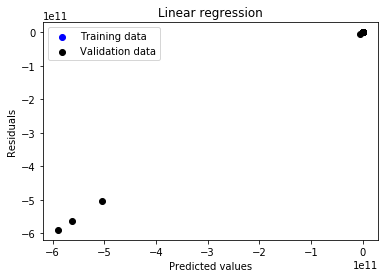

In [10]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "uppebr left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

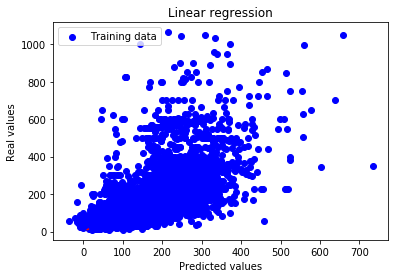

In [11]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
#plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [12]:
from sklearn.linear_model import Lasso

In [13]:
lasso = Lasso(alpha=0.0001, max_iter=10e5)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.457963543754
test score:  0.45199094409
number of features used:  70


In [20]:
lasso.predict(X_train.iloc[[1]])

array([ 228.33473214])